In [1]:
import cv2
import keras
from keras.applications.imagenet_utils import preprocess_input
from keras.backend.tensorflow_backend import set_session
from keras.models import Model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import imread
import tensorflow as tf

import sys
import os
dir = '/Users/LSK/PycharmProjects/panet/'
sys.path.append(dir)

from ssd import SSD300
from ssd_utils import BBoxUtility

%matplotlib inline 
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['image.interpolation'] = 'nearest'

np.set_printoptions(suppress=True)

config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.45
set_session(tf.Session(config=config))

Using TensorFlow backend.
/home/jacky/anaconda3/envs/panet/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jacky/anaconda3/envs/panet/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jacky/anaconda3/envs/panet/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jacky/anaconda3/envs

In [2]:
voc_classes = ['Aeroplane', 'Bicycle', 'Bird', 'Boat', 'Bottle',
               'Bus', 'Car', 'Cat', 'Chair', 'Cow', 'Diningtable',
               'Dog', 'Horse','Motorbike', 'Person', 'Pottedplant',
               'Sheep', 'Sofa', 'Train', 'Tvmonitor']
NUM_CLASSES = len(voc_classes) + 1
print(NUM_CLASSES)

21


In [3]:
input_shape=(300, 300, 3)
model = SSD300(input_shape, num_classes=NUM_CLASSES)
model.load_weights(os.path.join(dir,'weights_SSD300.hdf5'), by_name=True)

# print(model.get_layer('mbox_conf').output_shape)

bbox_util = BBoxUtility(NUM_CLASSES)

/media/jacky/drive21/research/focused_attention/sikuns_work/Master_codes/panet/ssd.py:39: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", name="conv1_1", padding="same")`
  name='conv1_1')(net['input'])
/media/jacky/drive21/research/focused_attention/sikuns_work/Master_codes/panet/ssd.py:43: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", name="conv1_2", padding="same")`
  name='conv1_2')(net['conv1_1'])
/media/jacky/drive21/research/focused_attention/sikuns_work/Master_codes/panet/ssd.py:45: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D((2, 2), strides=(2, 2), name="pool1", padding="same")`
  name='pool1')(net['conv1_2'])
/media/jacky/drive21/research/focused_attention/sikuns_work/Master_codes/panet/ssd.py:50: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", name="conv2_1", padding="same")`
  name='conv2_

/media/jacky/drive21/research/focused_attention/sikuns_work/Master_codes/panet/ssd.py:215: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), name="conv8_2_mbox_loc", padding="same")`
  name='conv8_2_mbox_loc')(net['conv8_2'])
/media/jacky/drive21/research/focused_attention/sikuns_work/Master_codes/panet/ssd.py:223: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(126, (3, 3), name="conv8_2_mbox_conf", padding="same")`
  name=name)(net['conv8_2'])
/media/jacky/drive21/research/focused_attention/sikuns_work/Master_codes/panet/ssd.py:257: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  mode='concat', concat_axis=1, name='mbox_loc')
/home/jacky/anaconda3/envs/panet/lib/python3.6/site-packages/keras/legacy/layers.py:460: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.l

OSError: Unable to open file (unable to open file: name = '/Users/LSK/PycharmProjects/panet/weights_SSD300.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [27]:
inputs = []
images = []
img_path = os.path.join(dir,'./pics/fish-bike.jpg')
img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img)
images.append(imread(img_path))
inputs.append(img.copy())
img_path = os.path.join(dir,'./pics/cat.jpg')
img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img)
images.append(imread(img_path))
inputs.append(img.copy())
img_path = os.path.join(dir,'./pics/boys.jpg')
img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img)
images.append(imread(img_path))
inputs.append(img.copy())
img_path = os.path.join(dir,'./pics/car_cat.jpg')
img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img)
images.append(imread(img_path))
inputs.append(img.copy())
img_path = os.path.join(dir,'./pics/car_cat2.jpg')
img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img)
images.append(imread(img_path))
inputs.append(img.copy())
inputs = preprocess_input(np.array(inputs))
# print(inputs[0].shape)

In [28]:
preds = model.predict(inputs, batch_size=1, verbose=1)

5/5 [==============================] - 10s    
(5, 7308, 33)


In [29]:
results = bbox_util.detection_out(preds)

In [30]:
# %%time
# a = model.predict(inputs, batch_size=1)
# b = bbox_util.detection_out(preds)

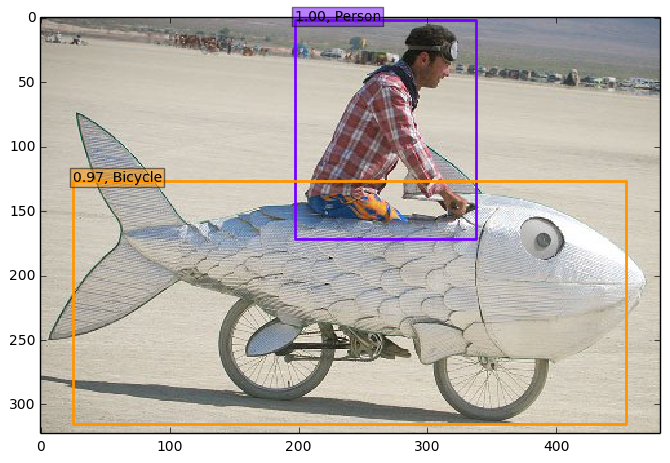

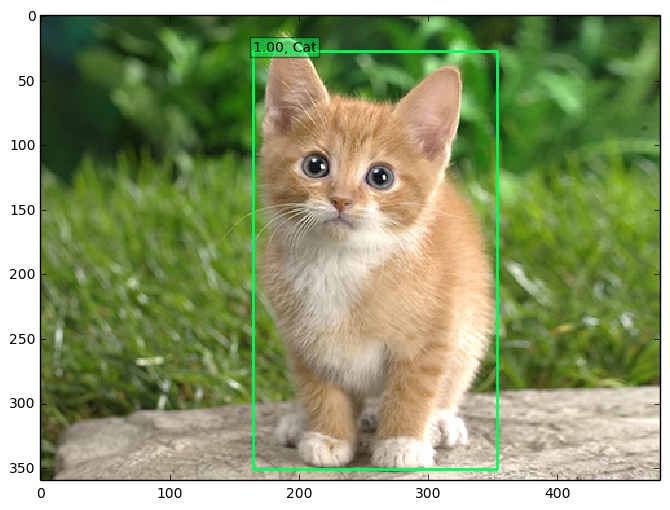

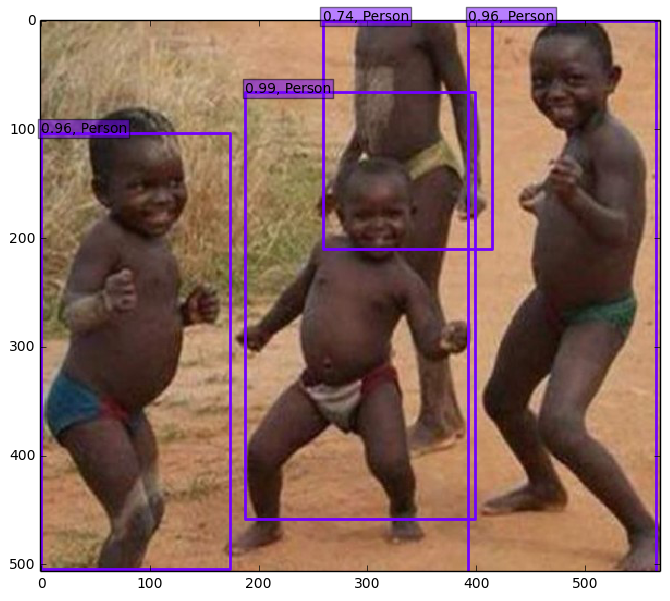

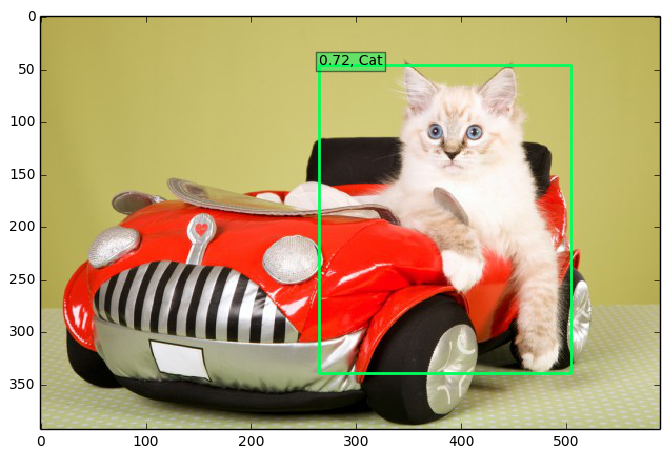

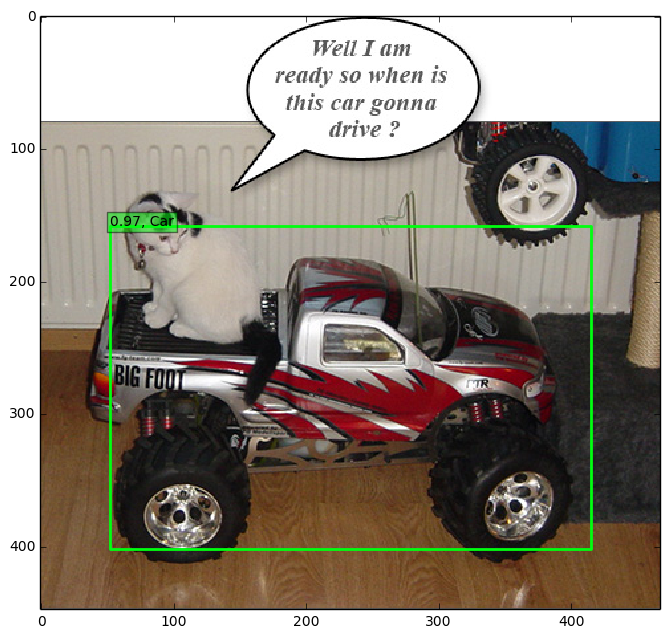

In [32]:
for i, img in enumerate(images):
    # Parse the outputs.
    det_label = results[i][:, 0]
    det_conf = results[i][:, 1]
    det_xmin = results[i][:, 2]
    det_ymin = results[i][:, 3]
    det_xmax = results[i][:, 4]
    det_ymax = results[i][:, 5]

    # Get detections with confidence higher than 0.6.
    top_indices = [j for j, conf in enumerate(det_conf) if conf >= 0.6]

    top_conf = det_conf[top_indices]
    top_label_indices = det_label[top_indices].tolist()
    top_xmin = det_xmin[top_indices]
    top_ymin = det_ymin[top_indices]
    top_xmax = det_xmax[top_indices]
    top_ymax = det_ymax[top_indices]

    colors = plt.cm.hsv(np.linspace(0, 1, 21)).tolist()

    plt.imshow(img / 255.)
    currentAxis = plt.gca()

    for i in range(top_conf.shape[0]):
        xmin = int(round(top_xmin[i] * img.shape[1]))
        ymin = int(round(top_ymin[i] * img.shape[0]))
        xmax = int(round(top_xmax[i] * img.shape[1]))
        ymax = int(round(top_ymax[i] * img.shape[0]))
        score = top_conf[i]
        label = int(top_label_indices[i])
        label_name = voc_classes[label - 1]
        display_txt = '{:0.2f}, {}'.format(score, label_name)
        coords = (xmin, ymin), xmax-xmin+1, ymax-ymin+1
        color = colors[label]
        currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
        currentAxis.text(xmin, ymin, display_txt, bbox={'facecolor':color, 'alpha':0.5})
    
    plt.show()